<a href="https://colab.research.google.com/github/antoinevangorp/DatabasManagementPractice_IBT3205/blob/main/lab_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Importing the sqlite3 library for SQLite database operations
import sqlite3

# Function to connect to SQLite database
def connect_to_db(db_name):
    try:

        # Connect to SQLite database
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully.")
        return conn

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None



# Function to create tables
def create_tables(conn):
    try:
        # Create a cursor object
        cursor = conn.cursor()

        # SQL queries to create tables
        # Existing tables: Companies, Branches, Courses, Students
        # New tables: Enrollment, Logging, Teacher, Department

        # Companies Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Companies (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            headquarters TEXT
        );
        """)

        # Branches Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Branches (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            company_id INTEGER,
            location TEXT NOT NULL,
            FOREIGN KEY (company_id) REFERENCES Companies (id)
        );
        """)

        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Courses (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            branch_id INTEGER,
            name TEXT NOT NULL,
            duration INTEGER,
            FOREIGN KEY (branch_id) REFERENCES Branches (id)
        );
        """)

        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Students (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            course_id INTEGER,
            name TEXT NOT NULL,
            age INTEGER,
            FOREIGN KEY (course_id) REFERENCES Courses (id)
        );
        """)

        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Enrollment (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            student_id INTEGER,
            course_id INTEGER,
            enrollment_date TEXT,
            FOREIGN KEY (student_id) REFERENCES Students (id),
            FOREIGN KEY (course_id) REFERENCES Courses (id)
        );
        """)

        # Logging Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Logging (
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          activity TEXT NOT NULL,
          timestamp TEXT NOT NULL
        );
          """)

        # Teacher Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Teacher (
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          branch_id INTEGER, name TEXT NOT NULL,
          subject TEXT,
          FOREIGN KEY (branch_id) REFERENCES Branches (id)
        );
        """)

        # Department Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS Department (
          id INTEGER PRIMARY KEY AUTOINCREMENT,
          branch_id INTEGER,
          name TEXT NOT NULL,
          FOREIGN KEY (branch_id) REFERENCES Branches (id)
        );
        """)

        conn.commit()
        print("Tables created successfully.")

    except sqlite3.Error as e:
        # Rollback the transaction in case of an error
        conn.rollback()
        print(f"Error occurred: {e}")

# Function to list all tables in the SQLite database
def list_tables(conn):
    try:
        # create a cursor object
        cursor = conn.cursor()

        # SQL query to fetch all tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")

        # Fetch all table names
        tables = cursor.fetchall()

        # Display table names
        for table in tables:
            print(f"Table: {table[0]}")

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")

# Main function

if __name__ == "__main__":
    # Connect to SQLite database
    conn = connect_to_db("education_company.db")

    if conn:
        # Create tables
        create_tables(conn)

        # List all tables in the database
        print("Listing all tables in the database:")
        list_tables(conn)

        # Close the database connection
        conn.close()

Connected to education_company.db successfully.
Tables created successfully.
Listing all tables in the database:
Table: Companies
Table: sqlite_sequence
Table: Branches
Table: Courses
Table: Students
Table: Enrollment
Table: Logging
Table: Teacher
Table: Department


In [7]:
# Importing the sqlite3 library for SQLite database operations
# Importing pandas for data visualization

import sqlite3

import pandas as pd

# Function to connect to SQLite database
def connect_to_db(db_name):
    try:
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully")
        return conn
    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None

# # Function to insert sample data into tables
# def insert_sample_data(conn):
#     try:
#         cursor = conn.cursor()

#         # Insert 20 sample rows into Companies table
#         for i in range(1, 21):
#             cursor.execute("INSERT INTO Companies (name, headquarters) VALUES (?, ?)", (f'Company{i}', f'Location{i}'))

#         # Insert 20 sample rows into Branches table
#         for i in range(1, 21):
#             cursor.execute("INSERT INTO Branches (company_id, location) VALUES (?, ?)", (i, f'Branchlocation{i}'))

#         # Insert 20 sample rows into Courses table
#         for i in range(1, 21):
#             cursor.execute("INSERT INTO Courses (branch_id, name, duration) VALUES (?, ?, ?)", (i, f'Course{i}', i%5))
#     except sqlite3.Error as e:
#         print(f"Error occurred: {e}")

# Function to insert sample data into tables
def insert_sample_data(conn):
    try:
      cursor = conn.cursor()

      # Insert 20 sample rows into Companies table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Companies (name, headquarters) VALUES ('Company{}', 'Location{}')".format(i, i))

      # Insert 20 sample rows into Branches table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Branches (company_id, location) VALUES (2, 'BranchLocation{}')".format(i))

      # Insert 20 sample rows into Courses table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Courses (branch_id, name, duration) VALUES (2, 'Course{}', 15)".format(i))

      # Insert 20 sample rows into Students table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Students (course_id, name, age) VALUES (2, 'Student{}', 24)".format(i))

      # Insert 20 sample rows into Enrollment table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Enrollment (student_id, course_id, enrollment_date) VALUES (1, 1, '2023-08-{}')".format(i))

      # Insert 20 sample rows into Logging table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Logging (activity, timestamp) VALUES ('Activity{}', '2023-10-{} 12:34:56')".format(i, i))

      # Insert 20 sample rows into Teacher table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Teacher (branch_id, name, subject) VALUES (2, 'Teacher{}', 'Subject{}')".format(i, i))

      # Insert 20 sample rows into Department table
      for i in range(1, 21):
          cursor.execute("INSERT INTO Department (branch_id, name) VALUES (2, 'Department{}')".format(i))

      # Commit the transaction
      conn.commit()

      print("Sample data inserted successfully.")
    except sqlite3.Error as e:
      conn.rollback()
      print(f"Error occurred: {e}")

# Function to show rows from all tables
def show_rows(conn):
    try:
        cursor = conn.cursor()

        # List of table names
        tables = ["Companies", "Branches", "Courses", "Students", "Enrollment", "Logging", "Teacher", "Department"]

        # Fetch and display rows from each table
        for table in tables:
            print (f"\nRows from {table} table:")
            cursor.execute(f"SELECT * FROM {table}")
            rows = cursor.fetchall()
            for row in rows:
                print(row)

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")

# Function to create a rudimentary data analytics dashboard
def data_analytics_dashboard(conn):
    try:
        # Using pandas to read SQL queries into DataFrames
        df_companies = pd.read_sql_query("SELECT * FROM Companies", conn)
        df_branches = pd.read_sql_query("SELECT * FROM Branches", conn)

        # Display basic statistics for Companies and Branches tables
        print("\nBasic statistics for Companies table:")
        print(df_companies.describe())

        print("\nBasic statistics for Branches table:")
        print(df_branches.describe())

    except sqlite3.Error as e:
        print(f"Error occurred: {e}")

# Main function
if __name__ == "__main__":
    conn = connect_to_db("education_company.db")

    if conn:
        # Insert sample data
        insert_sample_data(conn)

        # Show rows from all tables
        print("\nShowing rows from all tables:")
        show_rows(conn)

        # Data analytics dashboard
        print("\nData Analytics Dashboard:")
        data_analytics_dashboard(conn)

        # Close the database connection
        conn.close()


Connected to education_company.db successfully
Sample data inserted successfully.

Showing rows from all tables:

Rows from Companies table:
(1, 'Company1', 'Location1')
(2, 'Company2', 'Location2')
(3, 'Company3', 'Location3')
(4, 'Company4', 'Location4')
(5, 'Company5', 'Location5')
(6, 'Company6', 'Location6')
(7, 'Company7', 'Location7')
(8, 'Company8', 'Location8')
(9, 'Company9', 'Location9')
(10, 'Company10', 'Location10')
(11, 'Company11', 'Location11')
(12, 'Company12', 'Location12')
(13, 'Company13', 'Location13')
(14, 'Company14', 'Location14')
(15, 'Company15', 'Location15')
(16, 'Company16', 'Location16')
(17, 'Company17', 'Location17')
(18, 'Company18', 'Location18')
(19, 'Company19', 'Location19')
(20, 'Company20', 'Location20')

Rows from Branches table:
(1, 2, 'BranchLocation1')
(2, 2, 'BranchLocation2')
(3, 2, 'BranchLocation3')
(4, 2, 'BranchLocation4')
(5, 2, 'BranchLocation5')
(6, 2, 'BranchLocation6')
(7, 2, 'BranchLocation7')
(8, 2, 'BranchLocation8')
(9, 2, 'Bra

Connected to education_company.db successfully.

Data Analytics Dashboard:


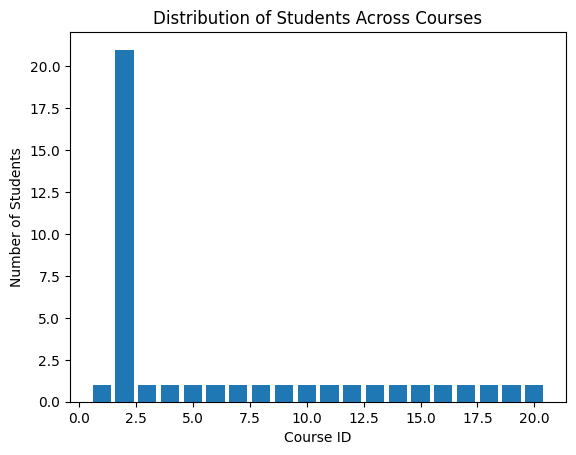

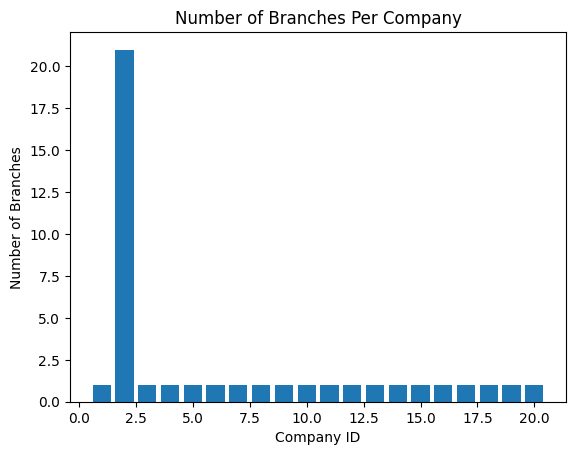

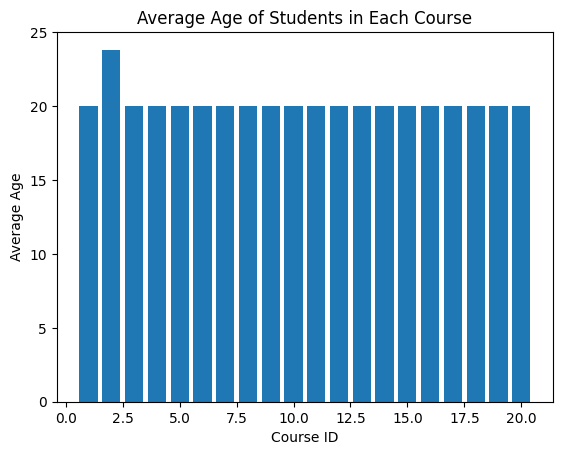

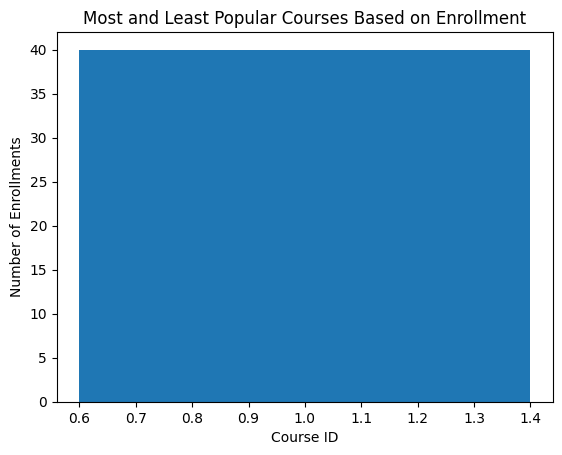

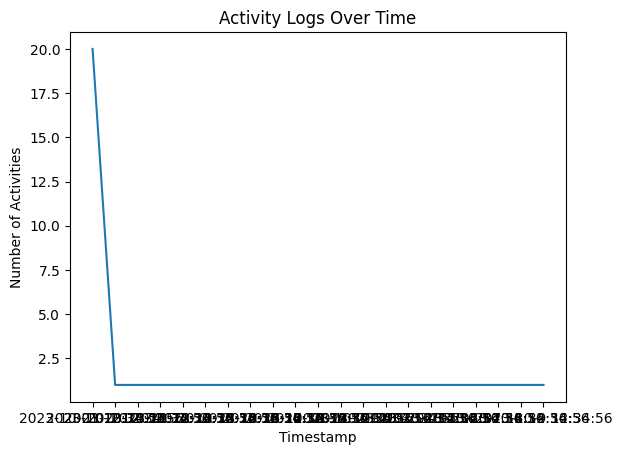

In [12]:
# Importing the sqlite3 library for SQLite database operations
# Importing pandas for data visualization
# Importing matplotlib for plotting

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Function to connect to SQLite database
def connect_to_db(db_name):
    try:
        conn = sqlite3.connect(db_name)
        print(f"Connected to {db_name} successfully.")
        return conn
    except sqlite3.Error as e:
        print(f"Error occurred: {e}")
        return None

# Function to insert sample data into tables
def insert_sample_data(conn):
  try:
    cursor = conn.cursor()

    # Insert 20 sample rows into Companies table
    for i in range(1, 21):
        cursor.execute("INSERT INTO Companies (name, headquarters) VALUES (?, ?)",
                       (f'Company{i}', f'Location{i}'))

    # Insert 20 sample rows into Branches table
    for i in range(1, 21):
        cursor.execute("INSERT INTO Branches (company_id, location) VALUES (?, ?)",
                       (i, f'BranchLocation{i}'))

    # Insert 20 sample rows into Courses table
    for i in range(1, 21):
        cursor.execute("INSERT INTO Courses (branch_id, name, duration) VALUES (?, ?, ?)",
                       (i, f'Course{i}', 175))

    # Insert 20 sample rows into Students table
    for i in range(1, 21):
        cursor.execute("INSERT INTO Students (course_id, name, age) VALUES (?, ?, ?)",
                       (i, f'Student{i}', 20))
    # Commit the transaction
    conn.commit()

    print("Sample data Inserted successfully.")

  except sqlite3.Error as e:
    conn.rollback()
    print(f"Error occurred: {e}")

def show_rows(conn):
  try:
    cursor = conn.cursor()
    # List of table names
    tables = ['Companies', 'Branches', 'Courses', 'Students', 'Enrollment', 'Logging', 'Teacher', 'Department']

    # Fetch and display rows from each table
    for table in tables:
        print(f"\nRows from {table} table:")
        cursor.execute(f"SELECT * FROM {table}")
        rows = cursor.fetchall()
        for row in rows:
            print(row)

  except sqlite3.Error as e:
      print(f'Error occurred: {e}')

# Function to create a rudimentary data analytics dashboard
def data_analytics_dashboard(conn):
  try:
    # 1. Distribution of students across courses
    df1 = pd.read_sql_query("SELECT course_id, COUNT(*) as num_students FROM Students GROUP BY course_id", conn)
    plt.bar(df1["course_id"], df1['num_students'])
    plt.title("Distribution of Students Across Courses")
    plt.xlabel("Course ID")
    plt.ylabel("Number of Students")
    plt.show()

    # 2. Number of branches per company
    df2 = pd.read_sql_query("SELECT company_id, COUNT(*) as num_branches FROM Branches GROUP BY company_id", conn)
    plt.bar(df2["company_id"], df2['num_branches'])
    plt.title("Number of Branches Per Company")
    plt.xlabel("Company ID")
    plt.ylabel("Number of Branches")
    plt.show()

    # 3. Average age of students in each course
    df3 = pd.read_sql_query("SELECT course_id, AVG(age) as avg_age FROM Students GROUP BY course_id", conn)
    plt.bar(df3["course_id"], df3["avg_age"])
    plt.title("Average Age of Students in Each Course")
    plt.xlabel("Course ID")
    plt.ylabel("Average Age")
    plt.show()

    # 4. Most and least popular courses based on enrollment
    df4 = pd.read_sql_query("SELECT course_id, COUNT(*) as num_enrollments FROM Enrollment GROUP BY course_id", conn)
    plt.bar(df4["course_id"], df4['num_enrollments'])
    plt.title("Most and Least Popular Courses Based on Enrollment")
    plt.xlabel("Course ID")
    plt.ylabel("Number of Enrollments")
    plt.show()

    #5. Activity logs over time (assuming timestamp is sortable)
    df = pd.read_sql_query("SELECT timestamp, COUNT(*) as nun_activities FROM Logging GROUP BY timestamp", conn)
    plt.plot(df['timestamp'], df['nun_activities'])
    plt.title("Activity Logs Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Number of Activities")
    plt.show()

  except sqlite3.Error as e:
    print(f"An error occurred: {e}")


# Main function

# Main function
if __name__ == "__main__":
  conn = connect_to_db("education_company.db")
  if conn:
      # Insert sample data
      # insert_sample_data(conn)

      # Show rows from all tables
      # print("\nShowing rows from all tables:")
      # show_rows(conn)

      # Data analytics dashboard
      print("\nData Analytics Dashboard:")
      data_analytics_dashboard(conn)

      # Close the database connection
      conn.close()
  else:
    print("error")